In [1]:
import qstrader

In [2]:
import os

import pandas as pd
import pytz

# alpha signal
from qstrader.alpha_model.fixed_signals import FixedSignalsAlphaModel

# asset types and universe
from qstrader.asset.equity import Equity
from qstrader.asset.universe.static import StaticUniverse

# data reader and provider
from qstrader.data.backtest_data_handler import BacktestDataHandler
from qstrader.data.daily_bar_csv import CSVDailyBarDataSource

# stats generator
from qstrader.statistics.tearsheet import TearsheetStatistics

# main thing
from qstrader.trading.backtest import BacktestTradingSession

In [3]:
start_dt = pd.Timestamp('2003-09-30 09:30:00', tz='America/New_York')
end_dt = pd.Timestamp('2019-12-31 16:00:00', tz='America/New_York')

# Construct the symbols and assets necessary for the backtest
strategy_symbols = ['SPY', 'AGG']
strategy_assets = ['EQ:%s' % symbol for symbol in strategy_symbols]
strategy_universe = StaticUniverse(strategy_assets)

In [4]:
os.environ["QSTRADER_CSV_DATA_DIR"] = '/Users/snk/pcode/archive/qstrader/data'

In [5]:
# To avoid loading all CSV files in the directory, set the
# data source to load only those provided symbols
csv_dir = os.environ.get('QSTRADER_CSV_DATA_DIR', '.')
data_source = CSVDailyBarDataSource(csv_dir , Equity, csv_symbols=strategy_symbols)
data_handler = BacktestDataHandler(strategy_universe, data_sources=[data_source])

Loading CSV files into DataFrames...
Loading CSV file for symbol 'EQ:SPY'...
Loading CSV file for symbol 'EQ:AGG'...
Loading pricing in CSV files...
Loading CSV file for symbol 'EQ:SPY'...
Loading CSV file for symbol 'EQ:AGG'...


In [6]:
# Construct an Alpha Model that simply provides
# static allocations to a universe of assets
# In this case 60% SPY ETF, 40% AGG ETF,
# rebalanced at the end of each month
strategy_alpha_model = FixedSignalsAlphaModel({'EQ:SPY': 0.6, 'EQ:AGG': 0.4})
strategy_backtest = BacktestTradingSession(
    start_dt,
    end_dt,
    strategy_universe,
    strategy_alpha_model,
    rebalance='end_of_month',
    long_only=True,
    cash_buffer_percentage=0.01,
    data_handler=data_handler
)
strategy_backtest.run(results = False)

Initialising simulated broker "Backtest Simulated Broker Account"...
(2003-09-30 09:30:00-04:00) - portfolio creation: Portfolio "000001" created at broker "Backtest Simulated Broker Account"
(2003-09-30 09:30:00-04:00) - subscription: 1000000.00 subscribed to portfolio "000001"
Beginning backtest simulation...
(2003-09-30 09:30:00-04:00) - market_open
(2003-09-30 16:00:00-04:00) - market_close
(2003-09-30 16:00:00-04:00) - trading logic and rebalance
(2003-09-30 16:00:00-04:00) - target weights: {'EQ:AGG': 0.4, 'EQ:SPY': 0.6}
(2003-09-30 16:00:00-04:00) - submitted order: EQ:AGG, qty: 3855
(2003-09-30 16:00:00-04:00) - submitted order: EQ:SPY, qty: 5942
(2003-10-01 09:30:00-04:00) - market_open
(2003-10-01 09:30:00-04:00) - executed order: EQ:AGG, qty: 3855, price: 102.64, consideration: 395677.00, commission: 0.00, total: 395677.00
(2003-10-01 09:30:00-04:00) - executed order: EQ:SPY, qty: 5942, price: 100.24, consideration: 595626.00, commission: 0.00, total: 595626.00
(2003-10-01 1

In [13]:
strategy_backtest.stats

{'dates': [Timestamp('2003-09-30 09:30:00-0400', tz='America/New_York'),
  Timestamp('2003-09-30 16:00:00-0400', tz='America/New_York'),
  Timestamp('2003-10-01 09:30:00-0400', tz='America/New_York'),
  Timestamp('2003-10-01 16:00:00-0400', tz='America/New_York'),
  Timestamp('2003-10-02 09:30:00-0400', tz='America/New_York'),
  Timestamp('2003-10-02 16:00:00-0400', tz='America/New_York'),
  Timestamp('2003-10-03 09:30:00-0400', tz='America/New_York'),
  Timestamp('2003-10-03 16:00:00-0400', tz='America/New_York'),
  Timestamp('2003-10-06 09:30:00-0400', tz='America/New_York'),
  Timestamp('2003-10-06 16:00:00-0400', tz='America/New_York'),
  Timestamp('2003-10-07 09:30:00-0400', tz='America/New_York'),
  Timestamp('2003-10-07 16:00:00-0400', tz='America/New_York'),
  Timestamp('2003-10-08 09:30:00-0400', tz='America/New_York'),
  Timestamp('2003-10-08 16:00:00-0400', tz='America/New_York'),
  Timestamp('2003-10-09 09:30:00-0400', tz='America/New_York'),
  Timestamp('2003-10-09 16:00:0

In [16]:
stats = strategy_backtest.get_stats_dataframe()

/Users/snk/pcode/archive/qstrader/qstrader/trading/backtest.py:446: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  stats_dfs['portfolio_snapshots'] = pd.concat(df_list)


In [15]:
stats['equity_curve']

,Equity
Date,
2003-09-30 16:00:00-04:00,1.000000e+06
2003-10-01 16:00:00-04:00,1.010972e+06
2003-10-02 16:00:00-04:00,1.012554e+06
2003-10-03 16:00:00-04:00,1.015286e+06
2003-10-06 16:00:00-04:00,1.018657e+06
...,...
2019-12-25 16:00:00-05:00,2.163658e+06
2019-12-26 16:00:00-05:00,2.171320e+06
2019-12-27 16:00:00-05:00,2.172122e+06


In [17]:
jstats = strategy_backtest.stats

In [45]:
import json
from pandas import Timestamp


def convert_timestamps(obj):
    if isinstance(obj, dict):
        return {k: convert_timestamps(v) for k, v in obj.items()}
    elif isinstance(obj, list):
        return [convert_timestamps(item) for item in obj]
    elif isinstance(obj, tuple):
        return tuple(convert_timestamps(item) for item in obj)  # Convert tuple elements
    elif isinstance(obj, Timestamp):
        return obj.isoformat()
    return obj

# Convert and save
converted_data = convert_timestamps(jstats.copy())

In [58]:
converted_data['current_portfolio']

[{'date': '2003-09-30T16:00:00-04:00',
  'event': 'market_close',
  'portfolio': {}},
 {'date': '2003-10-31T16:00:00-05:00',
  'event': 'market_close',
  'portfolio': {'EQ:AGG': {'quantity': 3855,
    'market_value': np.float64(392207.6917648315),
    'unrealised_pnl': np.float64(-3469.505882263238),
    'realised_pnl': 0.0,
    'total_pnl': np.float64(-3469.505882263238)},
   'EQ:SPY': {'quantity': 5942,
    'market_value': np.float64(625692.6181335448),
    'unrealised_pnl': np.float64(30066.550827026367),
    'realised_pnl': 0.0,
    'total_pnl': np.float64(30066.550827026367)}}},
 {'date': '2003-11-28T16:00:00-05:00',
  'event': 'market_close',
  'portfolio': {'EQ:AGG': {'quantity': 3995,
    'market_value': np.float64(406371.404876709),
    'unrealised_pnl': np.float64(-3491.9930267334007),
    'realised_pnl': 0.0,
    'total_pnl': np.float64(-3491.9930267334007)},
   'EQ:SPY': {'quantity': 5791.0,
    'market_value': np.float64(616451.9323272706),
    'unrealised_pnl': np.float64

In [25]:
converted_data.keys()

dict_keys(['dates', 'events', 'alpha_weights', 'risk_weights', 'optimised_weights', 'target_portfolio', 'current_portfolio', 'rebalance_orders', 'executed_orders', 'equity_curve', 'portfolio_snapshots'])

In [42]:
keys_to_keep = ['dates', 'events', 'alpha_weights', 'risk_weights', 'optimised_weights','target_portfolio', 'current_portfolio','rebalance_orders', 'executed_orders','equity_curve']

In [49]:
with open('6040stats.json', 'w') as f:
    json.dump(converted_data, f)

In [ ]:
tearsheet = TearsheetStatistics(
            strategy_equity=strategy_backtest.get_equity_curve(),
            benchmark_equity=benchmark_backtest.get_equity_curve(),
            title=strat_title
        )

In [60]:
tearsheet = TearsheetStatistics(
    strategy_equity=strategy_backtest.get_equity_curve(),
    benchmark_equity=benchmark_backtest.get_equity_curve(),
    title='60/40 US Equities/Bonds'
)
# tearsheet.plot_results()

In [ ]:
tearsheet

Initialising simulated broker "Backtest Simulated Broker Account"...
(2003-09-30 09:30:00-04:00) - portfolio creation: Portfolio "000001" created at broker "Backtest Simulated Broker Account"
(2003-09-30 09:30:00-04:00) - subscription: 1000000.00 subscribed to portfolio "000001"
Beginning backtest simulation...
(2003-09-30 09:30:00-04:00) - market_open
(2003-09-30 09:30:00-04:00) - trading logic and rebalance
(2003-09-30 09:30:00-04:00) - target weights: {'EQ:SPY': 1.0}
(2003-09-30 09:30:00-04:00) - submitted order: EQ:SPY, qty: 9852
(2003-09-30 09:30:00-04:00) - executed order: EQ:SPY, qty: 9852, price: 100.48, consideration: 989929.00, commission: 0.00, total: 989929.00
(2003-09-30 16:00:00-04:00) - market_close
(2003-10-01 09:30:00-04:00) - market_open
(2003-10-01 16:00:00-04:00) - market_close
(2003-10-02 09:30:00-04:00) - market_open
(2003-10-02 16:00:00-04:00) - market_close
(2003-10-03 09:30:00-04:00) - market_open
(2003-10-03 16:00:00-04:00) - market_close
(2003-10-06 09:30:00-

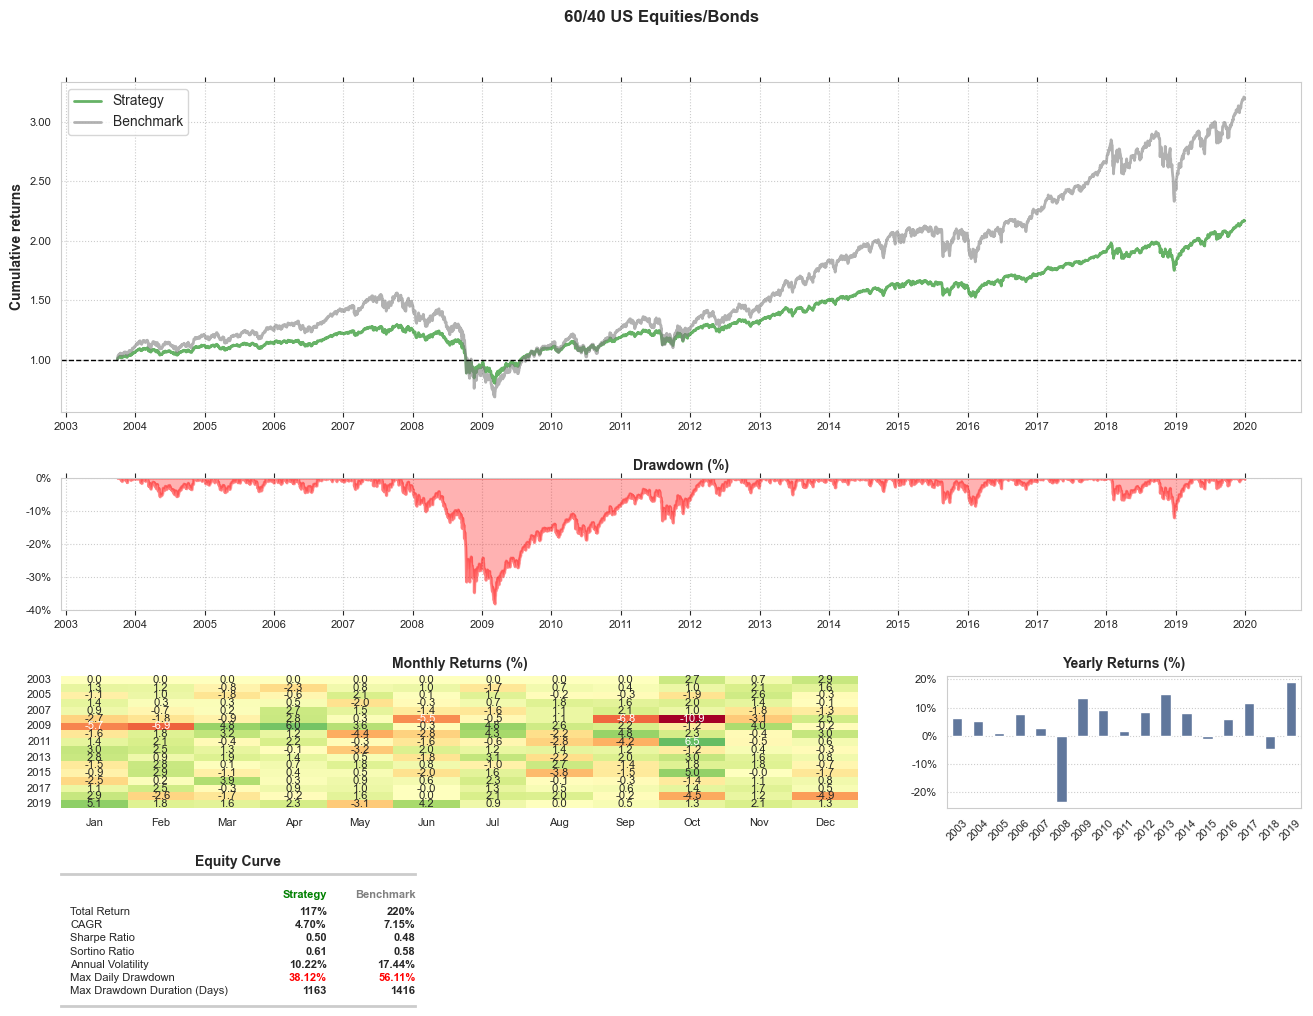

In [59]:
# Construct benchmark assets (buy & hold SPY)
benchmark_assets = ['EQ:SPY']
benchmark_universe = StaticUniverse(benchmark_assets)

# Construct a benchmark Alpha Model that provides
# 100% static allocation to the SPY ETF, with no rebalance
benchmark_alpha_model = FixedSignalsAlphaModel({'EQ:SPY': 1.0})
benchmark_backtest = BacktestTradingSession(
    start_dt,
    end_dt,
    benchmark_universe,
    benchmark_alpha_model,
    rebalance='buy_and_hold',
    long_only=True,
    cash_buffer_percentage=0.01,
    data_handler=data_handler
)
benchmark_backtest.run()

# Performance Output
tearsheet = TearsheetStatistics(
    strategy_equity=strategy_backtest.get_equity_curve(),
    benchmark_equity=benchmark_backtest.get_equity_curve(),
    title='60/40 US Equities/Bonds'
)
tearsheet.plot_results()